<a href="https://colab.research.google.com/github/bluefrappucino/IRISProject/blob/main/Finance_News_Analysis_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the library
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # Used for sentence tokenizer
nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/sample_data/all-data.csv', encoding='latin-1', names=['Sentiment', 'Text'])

# Display the DataFrame
df.head()

,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


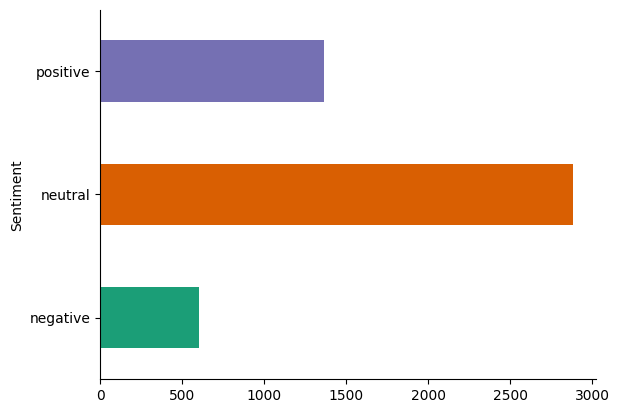

In [ ]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Check Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4846 non-null   object
 1   Text       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


<Axes: xlabel='Sentiment'>

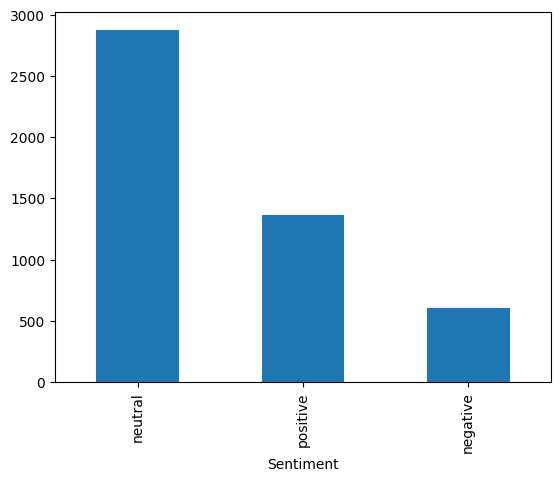

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

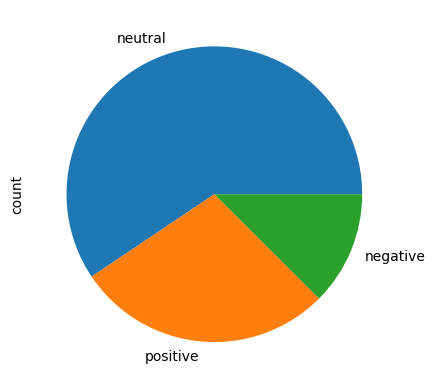

In [ ]:
df['Sentiment'].value_counts().plot(kind='pie')

Preprocessing Data

In [ ]:
text_lines = list()
lines = df['Text'].values.tolist()
for line in lines:
    tokens = word_tokenize(line)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    text_lines.append(words)

In [ ]:
len(text_lines)
df.shape

(4846, 2)

Word2Vec

In [ ]:
import gensim # Process plain text
EMBEDDING_DIM = 100
# train word2vec model
model = gensim.models.Word2Vec(sentences=text_lines, vector_size=EMBEDDING_DIM, window=5, min_count=1)
# vocab size
words = list(model.wv.key_to_index) # wv is the object that contain mappings between words and embeddings
print('Vocabulary size: %d' % len(words))

Vocabulary size: 9229


In [ ]:
words

['eur',
 'company',
 'said',
 'mn',
 'finnish',
 'sales',
 'million',
 'net',
 'profit',
 'finland',
 'group',
 'operating',
 'mln',
 'year',
 'new',
 'business',
 'period',
 'oyj',
 'quarter',
 'share',
 'also',
 'services',
 'market',
 'shares',
 'first',
 'euro',
 'helsinki',
 'loss',
 'compared',
 'operations',
 'today',
 'contract',
 'nokia',
 'total',
 'mobile',
 'financial',
 'products',
 'production',
 'per',
 'corporation',
 'bank',
 'percent',
 'according',
 'companies',
 'hel',
 'technology',
 'corresponding',
 'plant',
 'solutions',
 'service',
 'increased',
 'capital',
 'construction',
 'agreement',
 'investment',
 'well',
 'increase',
 'customers',
 'rose',
 'pct',
 'value',
 'us',
 'oy',
 'order',
 'stock',
 'would',
 'board',
 'omx',
 'unit',
 'development',
 'one',
 'building',
 'management',
 'part',
 'industry',
 'two',
 'russia',
 'earlier',
 'last',
 'equipment',
 'result',
 'paper',
 'second',
 'project',
 'expected',
 'decreased',
 'ceo',
 'maker',
 'employees',


In [ ]:
# save model in ASCII (word2vec) format
filename = 'imdb_embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

# NLP

In [ ]:
def get_sequences(text):
    #creating a tokenizer object
    tokenizer=Tokenizer()
    #using fit_on_text method to convert word into number most frequent would assign to 1 and with lower frequency assign to lower number
    tokenizer.fit_on_texts(text)
    #getting the word and the number assigning to them
    sequences=tokenizer.texts_to_sequences(text)


    #getting maximum length of list inthe sequences list

    print('Maximum Vocab',len(tokenizer.word_index))
    max_sequence_length=np.max(list(map(lambda x:len(x),sequences)))

    print('Max Sequences Length',max_sequence_length)

    sequences=pad_sequences(sequences,maxlen=max_sequence_length,padding='post')



    return sequences

In [ ]:
get_sequences(df['Text'])

Maximum Vocab 10122
Max Sequences Length 71


array([[  94,    5, 3498, ...,    0,    0,    0],
       [ 840,  336,    5, ...,    0,    0,    0],
       [   1,  293,  656, ...,    0,    0,    0],
       ...,
       [  42,   31,  242, ...,    0,    0,    0],
       [  30,   27,    2, ...,    0,    0,    0],
       [  27,    3,   35, ...,    0,    0,    0]], dtype=int32)

In [ ]:
def preprocess_inputs(df):
    df=df.copy()
    sequences=get_sequences(df['Text'])
    df['Sentiment']=df['Sentiment'].replace({'negative':0,'positive':1,'neutral':2})
    y=df['Sentiment']

    x_train,x_test,y_train,y_test=train_test_split(sequences,y,train_size=0.7,random_state=1)
    return x_train,x_test,y_train,y_test

In [ ]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
x_train

Maximum Vocab 10122
Max Sequences Length 71


array([[5442,  510,   16, ...,    0,    0,    0],
       [  22, 1628,    4, ...,    0,    0,    0],
       [1141,  936,  136, ...,    0,    0,    0],
       ...,
       [   1,  419,   16, ...,    0,    0,    0],
       [2586,  123, 3247, ...,    0,    0,    0],
       [  30,  615,  555, ...,    0,    0,    0]], dtype=int32)

In [ ]:
x_train.shape

(3392, 71)

In [ ]:
y_train

545     1
2374    0
4217    2
1071    2
716     1
       ..
2895    2
2763    2
905     1
3980    2
235     1
Name: Sentiment, Length: 3392, dtype: int64

Finding out similiar words

In [ ]:
model.wv.most_similar('man', topn =5) #top 5

[('shipping', 0.9831953644752502),
 ('india', 0.9831729531288147),
 ('north', 0.9829459190368652),
 ('ownership', 0.9828284978866577),
 ('london', 0.9828273057937622)]

Constructing the Neural Network

In [ ]:
inputs=tf.keras.Input(shape=(71,))
x=tf.keras.layers.Embedding(
input_dim=10123,
output_dim=128,
input_length=71)(inputs)
x=tf.keras.layers.GRU(256,activation='tanh')(x)
outputs=tf.keras.layers.Dense(3,activation='softmax')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train,y_train,validation_split=0.2,
                 batch_size=32,epochs=100,
                 callbacks=[tf.keras.callbacks.EarlyStopping(
                 monitor='val_loss',
                 patience=3,
                 restore_best_weights=True)])

Epoch 1/100
85/85 [==============================] - 28s 279ms/step - loss: 0.9268 - accuracy: 0.6052 - val_loss: 0.9790 - val_accuracy: 0.5700
Epoch 2/100
85/85 [==============================] - 23s 268ms/step - loss: 0.9153 - accuracy: 0.6052 - val_loss: 0.9610 - val_accuracy: 0.5700
Epoch 3/100
85/85 [==============================] - 28s 328ms/step - loss: 0.9137 - accuracy: 0.6052 - val_loss: 0.9583 - val_accuracy: 0.5700
Epoch 4/100
85/85 [==============================] - 25s 290ms/step - loss: 0.9174 - accuracy: 0.6052 - val_loss: 0.9635 - val_accuracy: 0.5700
Epoch 5/100
85/85 [==============================] - 21s 245ms/step - loss: 0.9168 - accuracy: 0.6052 - val_loss: 0.9722 - val_accuracy: 0.5700
Epoch 6/100
85/85 [==============================] - 25s 294ms/step - loss: 0.9158 - accuracy: 0.6052 - val_loss: 0.9710 - val_accuracy: 0.5700


In [ ]:
model.evaluate(x_test,y_test)

46/46 [==============================] - 3s 70ms/step - loss: 0.9381 - accuracy: 0.5846


[0.938073992729187, 0.5845942497253418]

In [ ]:
x_test

array([[   1, 1967,  159, ...,    0,    0,    0],
       [ 554,   16, 6822, ...,    0,    0,    0],
       [  42,   31,  242, ...,    0,    0,    0],
       ...,
       [  94,    5, 2084, ...,    0,    0,    0],
       [   1,  259,  184, ...,    0,    0,    0],
       [ 618,   12,  538, ...,    0,    0,    0]], dtype=int32)

In [ ]:
model.predict(x_test)

46/46 [==============================] - 6s 107ms/step


array([[0.15677215, 0.28340703, 0.5598207 ],
       [0.15677215, 0.28340703, 0.5598207 ],
       [0.15677215, 0.28340703, 0.5598207 ],
       ...,
       [0.15677217, 0.28340706, 0.5598208 ],
       [0.15677217, 0.28340703, 0.5598207 ],
       [0.15677217, 0.2834071 , 0.5598207 ]], dtype=float32)

In [ ]:
y_pred=np.argmax(model.predict(x_test),axis=1)

46/46 [==============================] - 5s 106ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

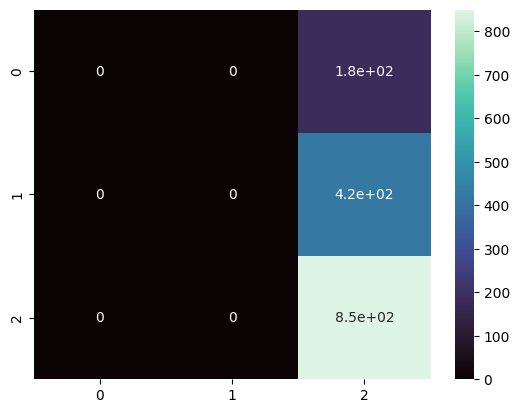

In [ ]:
cm=confusion_matrix(np.array(y_test),y_pred)
sns.heatmap(cm,annot=True,cmap='mako')
plt.show()

# Back to the Top

Finding the odd word out :

In [ ]:
print(model.wv.doesnt_match("finance".split()))
print(model.wv.doesnt_match("business holding".split()))

finance
business


Similarity between words :

In [ ]:
print(model.wv.similarity('finance', 'business'))

0.9893772


### Creating a dictionary to store the word and it’s corresponding embedding

In [ ]:
embeddings_index = {}
f = open('/content/imdb_embedding_word2vec.txt')
for line in f:
    print(line)
    values = line.split()
    word = values[0] # Since the word is at the 0th index
    coefs = np.asarray(values[1:]) # From the 1st position onwards the values are the embedding values
    embeddings_index[word] = coefs
f.close()

9229 100

eur -0.12150319 0.5355857 -0.113736466 0.50340307 0.097458296 -0.6909748 0.580532 1.4798734 -0.46532595 -0.53153694 0.36033276 -0.35832697 -0.124044046 0.5474938 -0.056005113 -0.27948624 0.5458416 -0.604455 -1.1391436 -0.64904934 0.084058195 0.40628988 0.8482832 0.13288264 -0.36925483 -0.31750858 -0.6399476 -0.69728434 -0.4039719 -0.12481603 0.75516295 -0.21762979 0.30794132 -0.8060407 -0.22835632 0.5371537 0.49785617 -0.29439232 -0.14482038 -1.0947653 -0.3876274 0.03599504 -0.0834772 -0.14588606 0.385595 -0.11274923 -0.5973447 0.05122903 0.2813913 0.53543335 -0.38877204 -0.75403076 -0.2786022 -0.4702265 -0.11472735 0.23230796 0.26001027 0.24955879 -0.2663776 0.48256707 0.2074093 0.11057358 0.6165893 0.06898361 -0.19205697 0.1855516 -0.32356545 0.9919391 -1.0623134 -0.1428719 0.20067503 0.43961155 1.0121201 0.039348908 0.2376357 -0.59278834 -0.4802579 0.20888758 -0.73142827 -0.5112576 -0.14267446 0.08013083 -0.29637995 0.41670465 -0.47672835 -0.4312667 0.7946072 0.3158641 0.4

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Tokenization and Padding :

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
VALIDATION_SPLIT = 0.2
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(text_lines)
sequences = tokenizer_obj.texts_to_sequences(text_lines) # Transforms text into a sequence of integers

In [ ]:
max_length = 100 # Maximum length of sentences
# pad sequences
word_index = tokenizer_obj.word_index # Maps words to their numeric representation
print('Found %s unique tokens.' % len(word_index))
text_pad = pad_sequences(sequences, maxlen=max_length)
sentiment =  df['Sentiment'].values
print('Shape of review tensor:', text_pad.shape)
print('Shape of sentiment tensor:', sentiment.shape)

Found 9229 unique tokens.
Shape of review tensor: (4846, 100)
Shape of sentiment tensor: (4846,)


In [ ]:
tokenizer_obj.index_word

{1: 'eur',
 2: 'company',
 3: 'said',
 4: 'mn',
 5: 'finnish',
 6: 'sales',
 7: 'million',
 8: 'net',
 9: 'profit',
 10: 'finland',
 11: 'group',
 12: 'operating',
 13: 'mln',
 14: 'year',
 15: 'new',
 16: 'business',
 17: 'period',
 18: 'oyj',
 19: 'quarter',
 20: 'share',
 21: 'also',
 22: 'services',
 23: 'market',
 24: 'shares',
 25: 'first',
 26: 'euro',
 27: 'helsinki',
 28: 'loss',
 29: 'compared',
 30: 'today',
 31: 'operations',
 32: 'contract',
 33: 'nokia',
 34: 'total',
 35: 'financial',
 36: 'mobile',
 37: 'production',
 38: 'products',
 39: 'per',
 40: 'corporation',
 41: 'bank',
 42: 'according',
 43: 'percent',
 44: 'companies',
 45: 'hel',
 46: 'technology',
 47: 'corresponding',
 48: 'plant',
 49: 'solutions',
 50: 'service',
 51: 'increased',
 52: 'construction',
 53: 'capital',
 54: 'agreement',
 55: 'investment',
 56: 'well',
 57: 'increase',
 58: 'rose',
 59: 'customers',
 60: 'pct',
 61: 'value',
 62: 'order',
 63: 'us',
 64: 'oy',
 65: 'stock',
 66: 'would',
 67

In [ ]:
tokenizer_obj.word_index

{'eur': 1,
 'company': 2,
 'said': 3,
 'mn': 4,
 'finnish': 5,
 'sales': 6,
 'million': 7,
 'net': 8,
 'profit': 9,
 'finland': 10,
 'group': 11,
 'operating': 12,
 'mln': 13,
 'year': 14,
 'new': 15,
 'business': 16,
 'period': 17,
 'oyj': 18,
 'quarter': 19,
 'share': 20,
 'also': 21,
 'services': 22,
 'market': 23,
 'shares': 24,
 'first': 25,
 'euro': 26,
 'helsinki': 27,
 'loss': 28,
 'compared': 29,
 'today': 30,
 'operations': 31,
 'contract': 32,
 'nokia': 33,
 'total': 34,
 'financial': 35,
 'mobile': 36,
 'production': 37,
 'products': 38,
 'per': 39,
 'corporation': 40,
 'bank': 41,
 'according': 42,
 'percent': 43,
 'companies': 44,
 'hel': 45,
 'technology': 46,
 'corresponding': 47,
 'plant': 48,
 'solutions': 49,
 'service': 50,
 'increased': 51,
 'construction': 52,
 'capital': 53,
 'agreement': 54,
 'investment': 55,
 'well': 56,
 'increase': 57,
 'rose': 58,
 'customers': 59,
 'pct': 60,
 'value': 61,
 'order': 62,
 'us': 63,
 'oy': 64,
 'stock': 65,
 'would': 66,
 'b

In [ ]:
text_pad[2000]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0, 2951, 1915,    2,  243,
       6639,  201, 1296,  125,  863,   23, 2012,   26, 6640,  434,  243,
       1155, 1281,    3, 1284, 6641,  243,  692,  184,  395,  231,   16,
         70], dtype=int32)

### Shuffling the dataset and splitting into train and validation

In [ ]:
# split the data into a training set and a validation set
indices = np.arange(text_pad.shape[0])
print(indices)
np.random.shuffle(indices)
print(indices)

[   0    1    2 ... 4843 4844 4845]
[4385  647 3017 ...  296 1866  964]


In [ ]:
text_pad = text_pad[indices]
sentiment = sentiment[indices]
num_validation_samples = int(VALIDATION_SPLIT * text_pad.shape[0])

In [ ]:
X_train_pad = text_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_pad = text_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

In [ ]:
print('Shape of Training dataset X:', X_train_pad.shape)
print('Shape of Training dataset Y:', y_train.shape)
print('Shape of Validation dataset X:', X_test_pad.shape)
print('Shape of Valodation daatset Y:', y_test.shape)

Shape of Training dataset X: (3877, 100)
Shape of Training dataset Y: (3877,)
Shape of Validation dataset X: (969, 100)
Shape of Valodation daatset Y: (969,)


Generating the Embedding Matrix from the trained word embeddings

In [ ]:
EMBEDDING_DIM =100
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
# words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

### Define the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.initializers import Constant
# define model
model = Sequential()
embedding_layer = Embedding(num_words, EMBEDDING_DIM, embeddings_initializer=Constant(embedding_matrix), input_length=max_length, trainable=False)
model.add(embedding_layer)
model.add(LSTM(units=32,  dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('Summary of the built model...')
print(model.summary())

Summary of the built model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          923000    
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 940057 (3.59 MB)
Trainable params: 17057 (66.63 KB)
Non-trainable params: 923000 (3.52 MB)
_________________________________________________________________
None


###Train the model

In [ ]:
print(y_train[:5])  # Check the first few training labels
print(y_test[:5])   # Check the first few test labels

['negative' 'positive' 'positive' 'neutral' 'neutral']
['neutral' 'positive' 'neutral' 'positive' 'neutral']


In [ ]:
model.summary()  # Check the model architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          923000    
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 940057 (3.59 MB)
Trainable params: 17057 (66.63 KB)
Non-trainable params: 923000 (3.52 MB)
_________________________________________________________________


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Define the model
model = Sequential()
model.add(Embedding(input_dim=9230, output_dim=100, input_length=100))  # Adjust input_dim as needed
model.add(LSTM(32))
model.add(Dense(units=4, activation='softmax'))  # Assuming 4 classes: 'negative', 'positive', 'neutral', and another class

# Compile the model with the appropriate loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          923000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                17024     
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 940156 (3.59 MB)
Trainable params: 940156 (3.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(X_train_pad.dtype, y_train.dtype)
print(X_test_pad.dtype, y_test.dtype)

int32 object
int32 object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Compile the model with the correct loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model with the encoded labels
model.fit(X_train_pad, y_train_encoded, batch_size=128, epochs=25, validation_data=(X_test_pad, y_test_encoded), verbose=2)

Epoch 1/25
31/31 - 14s - loss: 1.1829 - accuracy: 0.5739 - val_loss: 0.9338 - val_accuracy: 0.6109 - 14s/epoch - 446ms/step
Epoch 2/25
31/31 - 8s - loss: 0.8357 - accuracy: 0.6358 - val_loss: 0.7876 - val_accuracy: 0.6646 - 8s/epoch - 247ms/step
Epoch 3/25
31/31 - 5s - loss: 0.6183 - accuracy: 0.7372 - val_loss: 0.7562 - val_accuracy: 0.6687 - 5s/epoch - 153ms/step
Epoch 4/25
31/31 - 6s - loss: 0.4262 - accuracy: 0.8164 - val_loss: 0.7602 - val_accuracy: 0.6698 - 6s/epoch - 186ms/step
Epoch 5/25
31/31 - 4s - loss: 0.3064 - accuracy: 0.8648 - val_loss: 0.8076 - val_accuracy: 0.7028 - 4s/epoch - 127ms/step
Epoch 6/25
31/31 - 4s - loss: 0.2532 - accuracy: 0.9167 - val_loss: 0.8008 - val_accuracy: 0.7183 - 4s/epoch - 118ms/step
Epoch 7/25
31/31 - 5s - loss: 0.1555 - accuracy: 0.9582 - val_loss: 0.8377 - val_accuracy: 0.7152 - 5s/epoch - 174ms/step
Epoch 8/25
31/31 - 4s - loss: 0.1040 - accuracy: 0.9737 - val_loss: 0.8995 - val_accuracy: 0.7234 - 4s/epoch - 134ms/step
Epoch 9/25
31/31 - 4s 

Save the model architecture and weights

In [ ]:
model.save_weights('Sentiment_Classifier_word2vec_first_try.h5')

In [ ]:
# We save the weights to a h5 file.
with open('model_architecture_Sentiment_classifier_word2vec_first_try.json','w') as f:
    f.write(model.to_json())

### Testing the Model

In [ ]:
from keras.models import load_model
from keras.models import model_from_json

In [ ]:
# Model reconstruction from JSON file
with open('/content/model_architecture_Sentiment_classifier_word2vec_first_try.json', 'r') as f:
    model = model_from_json(f.read())
model.load_weights('/content/Sentiment_Classifier_word2vec_first_try.h5')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert string labels to integers
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Compile the model with the correct loss function for multi-class classification
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Evaluate the model with the encoded labels
print('Testing...')
score, acc = model.evaluate(X_test_pad, y_test_encoded, batch_size=128)
print('Test score:', score)
print('Test accuracy:', acc)
print("Accuracy: {0:.2%}".format(acc))

Testing...
8/8 [==============================] - 4s 60ms/step - loss: 1.2860 - accuracy: 0.7141
Test score: 1.2860420942306519
Test accuracy: 0.7141382694244385
Accuracy: 71.41%
